## Mutual Information ##

Pearson Correlation is a widely used measure to evaluate the association between two variables, primarily suitable for assessing linear relationships. However, when dealing with non-linear connections, Mutual Information becomes indispensable in capturing relationship details.

Mutual Information serves to elucidate the interdependence between two variables by quantifying the dissimilarity between the joint distribution of the pair $(X, Y)$ and the product of their marginal distributions. This measure offers valuable insights into the strength and nature of associations, especially in cases where the relationship is nonlinear.

The descrete case;

$$ I(X;Y) = \sum_{y \in_Y}\sum_{x \in_X}p(X,Y)(x,y) \cdot log \frac{p(X,Y)(x,y)}{pX(x)pY(y)}$$

The continuous case;

$$ I(X;Y) = \int_Y \int_X p(X,Y)(x,y) \cdot log\frac{p(X,Y)(x,y)}{pX(x)pY(y)}dxdy$$

Consider the following example.

|  |Speeding Violations in last year | No speeding Violation in the last year | Total |
|--|--|--|--|
|Cell phone users | 25| 280 | 305 |
| Not a cell phone user | 45 | 405 |450 |
| Total | 70 | 685 | 755 |

In [1]:
import numpy as np
import pandas as pd

In [2]:
# generate rows
cell_phone_users = np.array([[25,280]])
not_cell_phone_users = np.array([[45,405]])

In [3]:
# calculate total number of observations
grand_total = np.sum(cell_phone_users) + np.sum(not_cell_phone_users)

In [4]:
# join arrays into a 2 x 2 table and divide values by grand total to get joint probabilities
joint_probabilities = np.concatenate(
    (cell_phone_users, not_cell_phone_users),
    axis = 0 ) / grand_total

In [5]:
# make into pandas dataframe for improved reading
contingencyTable = pd.DataFrame(joint_probabilities, 
                  columns = ["Y = Speeding", "Y = Not Speeding"], 
                  index = ["X = Cell Phone", "X = Not Cell Phone"])

# take a sum along the rows
contingencyTable['Row Total'] = contingencyTable.sum(axis = 1)

# take the column sum
contingencyTable.loc['Column Total'] = contingencyTable.sum()

In [6]:
# display the results
contingencyTable

,Y = Speeding,Y = Not Speeding,Row Total
X = Cell Phone,0.033113,0.370861,0.403974
X = Not Cell Phone,0.059603,0.536424,0.596026
Column Total,0.092715,0.907285,1.000000


In [7]:
# calculate the Mutual Information score in steps 
I_1 = 0.033113 * np.log2(0.033113 / (0.403974 * 0.092715)) 
I_2 = 0.370861 * np.log2(0.370861 / (0.403974 * 0.907285)) 
I_3 = 0.059603 * np.log2(0.059603 / (0.596026 * 0.092715)) 
I_4 = 0.536424 * np.log2(0.536424 / (0.596026 * 0.907285)) 

MI = I_1 + I_2 + I_3 + I_4

print('Mutual Information is: ', MI)

Mutual Information is:  0.0006814490043069573


Mutual information quantifies the amount of information shared between two variables. In this case, it measures the dependency between cell phone usage and speeding violations. A higher mutual information value indicates a stronger relationship or dependence between the variables, while a lower value indicates less dependence.

In [8]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest
from sklearn import datasets
import matplotlib.pyplot as plt

In [9]:
# make classification data with binary target values
data = datasets.make_classification(
    n_features = 4, 
    n_samples = 20, 
    random_state = 101)

In [10]:
# make a dataframe to improve readability
df = pd.DataFrame(data[0])

# add the targets
df['Y'] = data[1]

# inspect the results
df.head()

,0,1,2,3,Y
0,1.132571,-0.321234,0.371835,1.351682,1
1,2.327583,-1.854404,-0.149217,1.061118,1
2,-2.760772,2.486972,0.396833,-0.845391,0
3,-1.536856,0.155148,-0.719296,-2.237780,0
4,-1.925566,1.366443,-0.004797,-1.118881,0


Text(0, 0.5, 'Mutual Information')

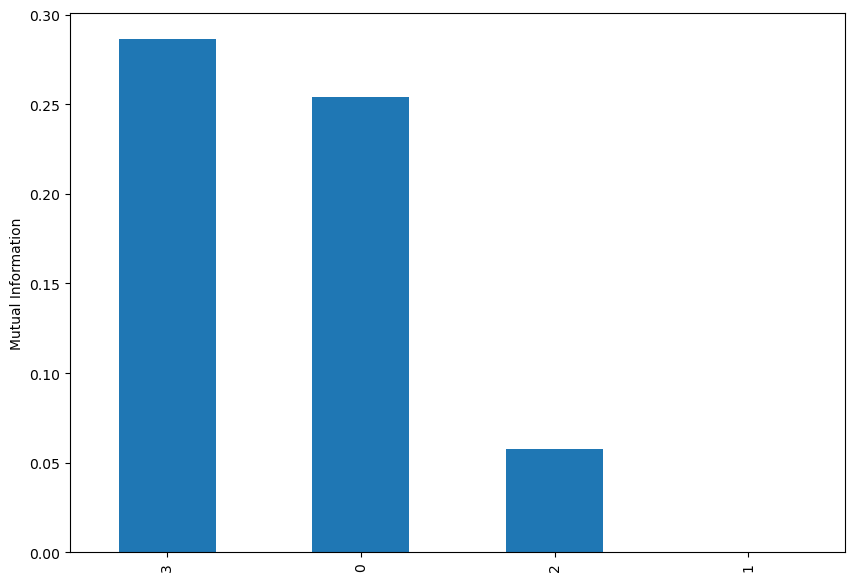

In [11]:
# select explanatory variables
X = df.iloc[ : , :-1 ]

# .values will give the values in a numpy array (shape: (n,1))
# .ravel will convert that array shape to (n, ) (i.e. flatten it)
# make the target values
Y = df.iloc[ : , -1: ].values.ravel()

# pass through the mutual infor classify function
mi = mutual_info_classif(X,Y)

# generate a series
mi = pd.Series(mi)

# give the values names from the columns, except for the target variable
mi.index = df.columns[: -1]

# plot
mi.sort_values(ascending = False).plot.bar(figsize = (10,7))
plt.ylabel("Mutual Information")

In [12]:
# demonstrate in a pipeline
from sklearn.pipeline import Pipeline

# create pipeline using K best selects where k = 2
pipe = Pipeline(
    [
        ('mutual_info', SelectKBest(mutual_info_classif, k = 2))
    ])

# fit the data to the pipeline
best_ = pipe.fit(X,Y)

# show the k-best features
best_.get_feature_names_out()

array(['x0', 'x3'], dtype=object)